In [1]:
from torchvision import models, transforms
import torch
from PIL import Image

In [11]:
resnet = models.resnet101(weights=True)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )])

In [3]:
img1 = Image.open("candy4.jpeg")
img2 = Image.open("candy5.jpeg")

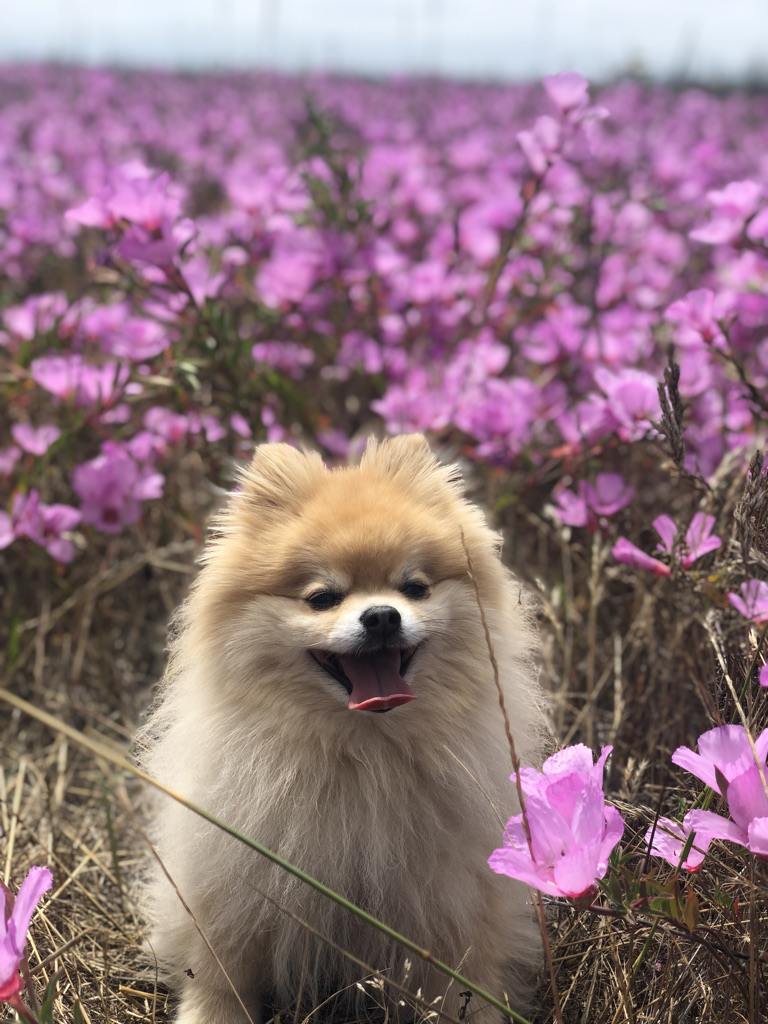

In [4]:
img1

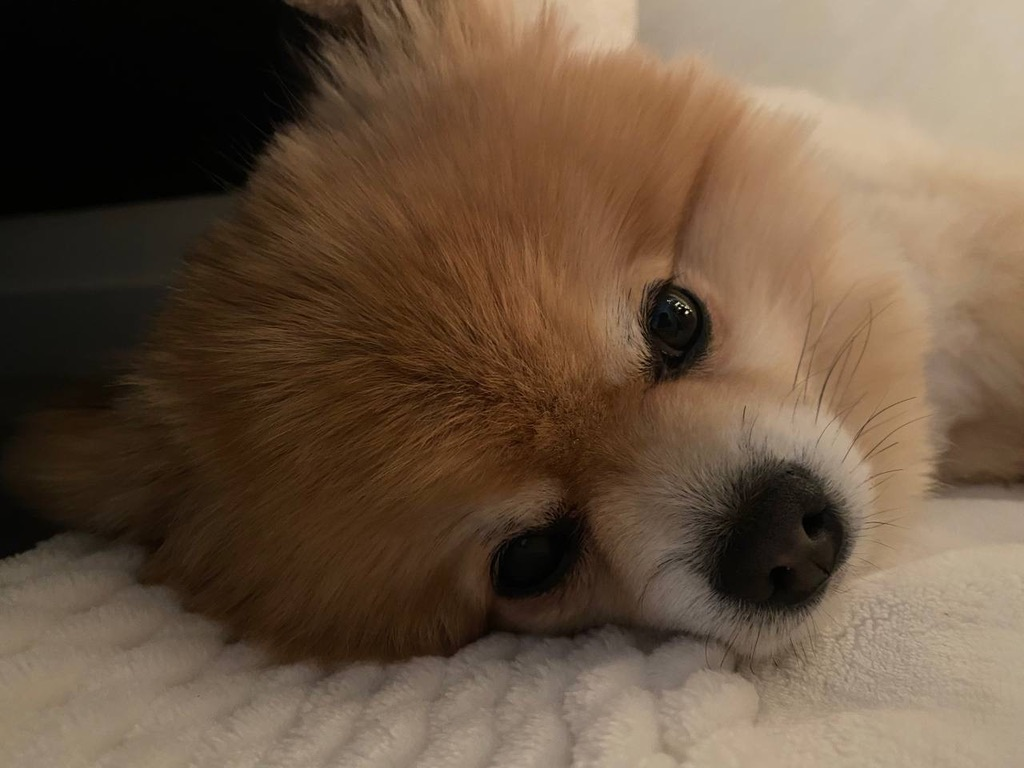

In [5]:
img2

In [6]:
img1_preprocessed = preprocess(img1)
img2_preprocessed = preprocess(img2)

In [8]:
batch_img1 = torch.unsqueeze(img1_preprocessed, 0)
batch_img2 = torch.unsqueeze(img2_preprocessed, 0)

In [14]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
out_img1 = resnet(batch_img1)
out_img2 = resnet(batch_img2)

In [19]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [30]:
from pprint import pprint
for out,img in zip([out_img1, out_img2], ["candy4.jpeg", "candy5.jpeg"]):
#     _, index = torch.max(out, 1)
    _, indices = torch.sort(out, descending=True)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    print(img)
    pprint([(labels[idx], percentage[idx].item()) for idx in indices[0][:10]])

candy4.jpeg
[("259: 'Pomeranian',", 99.19364166259766),
 ("261: 'keeshond',", 0.28211578726768494),
 ("151: 'Chihuahua',", 0.1936458796262741),
 ("154: 'Pekinese, Pekingese, Peke',", 0.09496275335550308),
 ("157: 'papillon',", 0.040257032960653305),
 ("265: 'toy poodle',", 0.019171012565493584),
 ("192: 'cairn, cairn terrier',", 0.012681759893894196),
 ("152: 'Japanese spaniel',", 0.011600538156926632),
 ("260: 'chow, chow chow',", 0.006068896036595106),
 ("758: 'reel',", 0.005681497510522604)]
candy5.jpeg
[("259: 'Pomeranian',", 96.55579376220703),
 ("154: 'Pekinese, Pekingese, Peke',", 2.430676221847534),
 ("263: 'Pembroke, Pembroke Welsh corgi',", 0.45234981179237366),
 ("151: 'Chihuahua',", 0.11000469326972961),
 ("260: 'chow, chow chow',", 0.06485432386398315),
 ("157: 'papillon',", 0.049942564219236374),
 ("778: 'scale, weighing machine',", 0.04215698316693306),
 ("258: 'Samoyed, Samoyede',", 0.036173611879348755),
 ("261: 'keeshond',", 0.030261706560850143),
 ("152: 'Japanese sp